In [36]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd

from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def get_data(file):
    """Get the data from csv file
    
    Args:

    Returns:
    
    """

    return pd.read_csv(file)


def clean_text(text):
    """ Make text lowercase, remove text in square brackets, remove punctuation and remove words
        containing numbers.
    Args:

    Returns:

    """

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[``""...]', '', text)
    text = re.sub('\n', '', text)

    return text

In [38]:
reviews = get_data('../data/raw/buscape.csv')
reviews['polarity'], reviews['review_text'] = reviews['polarity'].fillna(2.0), reviews['review_text'].fillna('')
reviews = reviews[:5000]
reviews.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...","estou muito satisfeito, o visor e melhor do qu...","['estou', 'muito', 'satisfeito', 'visor', 'mel...",1.0,4,1,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...","""muito boa\n\no que gostei: preco\n\no que nao...","['muito', 'boa', 'que', 'gostei', 'preco', 'qu...",1.0,5,1,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...","rapida, otima qualidade de impressao e facil d...","['rapida', 'otima', 'qualidade', 'de', 'impres...",1.0,5,1,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de otima qualidade em todos os quesito!,"['produto', 'de', 'otima', 'qualidade', 'em', ...",1.0,5,1,1
4,0_11324,Precisava comprar uma tv compatível com meu dv...,precisava comprar uma tv compativel com meu dv...,"['precisava', 'comprar', 'uma', 'tv', 'compati...",1.0,5,1,1


<AxesSubplot:title={'center':'Polarity Distribution'}>

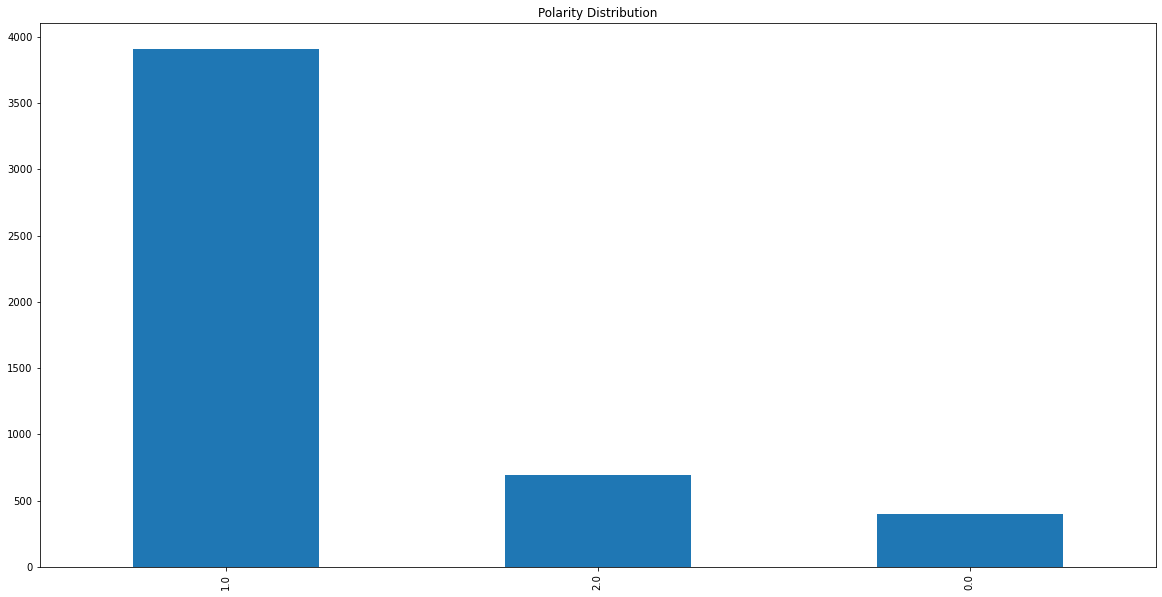

In [39]:
plt.figure(figsize=(20, 10))
plt.title('Polarity Distribution')
reviews['polarity'].value_counts().plot(kind='bar')

In [40]:
reviews_cleaned = pd.DataFrame(reviews['review_text'].apply(lambda x: clean_text(x)))
reviews_cleaned.head()

,review_text
0,estou muito satisfeito o visor é melhor do que...
1,muito boao que gostei precoo que não gostei po...
2,rápida ótima qualidade de impressão e fácil de...
3,produto de ótima qualidade em todos os quesito
4,precisava comprar uma tv compatível com meu dv...


### Counter Vectorizer

In [41]:
cv = CountVectorizer(stop_words=stopwords, max_features=100)
reviews_cv  = cv.fit_transform(reviews_cleaned['review_text'])
reviews_dtm = pd.DataFrame(reviews_cv.toarray(), columns=cv.get_feature_names_out())
reviews_dtm.index = reviews_cleaned.index

reviews_processed = pd.concat([reviews[['original_index']], reviews_dtm, reviews[['polarity']]], axis=1)

print(f"The counter vectorizer matrix has {reviews_processed.shape[0]} rows and {reviews_processed.shape[1]} columns")

The counter vectorizer matrix has 5000 rows and 102 columns


In [42]:
reviews_processed.head(5)

,original_index,achei,acho,agora,ainda,além,aparelho,apenas,aqui,bastante,...,tv,usar,uso,vale,valor,vem,vezes,ótima,ótimo,polarity
0,4_55516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,minus_1_105339,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,23_382139,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1.0
3,2_446456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
4,0_11324,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0


In [43]:
reviews_processed.to_pickle('../data/processed/buscape_counter_vectorized.pkl')

### TF-IDF Vectorizer

In [44]:
tv = TfidfVectorizer(stop_words=stopwords, max_features=100)
reviews_tv  = tv.fit_transform(reviews_cleaned['review_text'])
reviews_dtm = pd.DataFrame(reviews_tv.toarray(), columns=tv.get_feature_names_out())
reviews_dtm.index = reviews_cleaned.index

reviews_processed = pd.concat([reviews[['original_index']], reviews_dtm, reviews[['polarity']]], axis=1)

print(f"The TF-IDF vectorizer matrix has {reviews_processed.shape[0]} rows and {reviews_processed.shape[1]} columns")

The TF-IDF vectorizer matrix has 5000 rows and 102 columns


In [45]:
reviews_processed.head(5)

,original_index,achei,acho,agora,ainda,além,aparelho,apenas,aqui,bastante,...,tv,usar,uso,vale,valor,vem,vezes,ótima,ótimo,polarity
0,4_55516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
1,minus_1_105339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
2,23_382139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.349111,0.0,0.0,0.0,0.0,0.0,0.307764,0.0,1.0
3,2_446456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.557760,0.0,1.0
4,0_11324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.411994,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [46]:
reviews_processed.to_pickle('../data/processed/buscape_tfidf_vectorized.pkl')

### Glove Vectorizer

In [47]:
# Load the pre-trainned glove embedding.
glove = KeyedVectors.load_word2vec_format('../data/embeedings/glove_s50.txt')


In [48]:
# def vectorize_to_glove(text, size=50):


def text_to_glove(text, model, vectorizer=None, vocab=None, size=50):
    if not vectorizer:
        raise Exception("The vectorizer parameter must not be None")

    transformed = vectorizer.transform(text)
    vectorized  = pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names_out())

    embeedings = pd.DataFrame()
    for i in range(vectorized.shape[0]):
        sentence = np.zeros(size)
        for word in vocab[vectorized.iloc[i, :] > 0]:
            if model.get_index(word, default=-1) != -1:
                sentence = sentence + model.get_vector(word)

        embeedings = pd.concat([embeedings, pd.DataFrame([sentence])])

    return embeedings


reviews_dtm = text_to_glove(reviews_cleaned['review_text'], glove, tv, reviews_processed.columns[1:-1], 50)

In [49]:
reviews_dtm.shape

(5000, 50)

In [66]:
reviews_processed = pd.concat([reviews.reset_index()[['original_index']], reviews_dtm.reset_index(), reviews.reset_index()[['polarity']]], axis=1, ignore_index=True)

In [68]:
reviews_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,4_55516,0,-0.505194,-5.258832,-2.558232,-14.126455,1.254514,-0.159337,-0.264254,-0.420831,...,-1.666295,0.100782,0.407898,3.370718,0.468717,1.565112,-5.717022,-0.270108,-0.023164,1.0
1,minus_1_105339,0,-0.345296,0.021938,-0.421005,-3.905408,0.229204,0.490844,0.388737,0.426846,...,0.353611,-0.151610,-0.283253,0.222371,0.249038,0.840495,-0.145963,1.126054,-1.262863,1.0
2,23_382139,0,0.204053,-3.290582,-4.165740,-14.781974,0.537459,-0.605357,3.134963,3.305892,...,-1.775047,1.604656,-1.536050,-0.414184,1.119274,1.140087,-4.853476,-1.484016,-3.290981,1.0
3,2_446456,0,-0.318760,-0.469217,-3.177627,-9.524106,-1.834537,-0.589546,0.195963,-0.082686,...,-0.756618,1.448405,0.302610,0.439882,0.116350,1.043882,-2.909157,-2.304275,-0.646020,1.0
4,0_11324,0,-1.428227,-1.543352,-0.989623,-15.837947,-3.343933,2.344591,-1.032179,0.700109,...,-0.877178,-0.336693,0.613263,1.621126,2.594646,0.981895,-6.603691,-1.009780,-2.920937,1.0


In [69]:
reviews_processed.to_pickle('../data/processed/buscape_glove_s50_vectorized.pkl')